## Open Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@3baf5137

This op performs [morphological opening](https://en.wikipedia.org/wiki/Opening_(morphology)) on any binary image. Let's see how the `Op` is called:

In [2]:
ij.op().help("open")

Available operations:
	(IterableInterval out?) =
	net.imagej.ops.morphology.open.ListOpen(
		IterableInterval out?,
		RandomAccessibleInterval in1,
		List in2)

Note the parameters here:

* `IterableInterval out`: the output image
* `RandomAccessibleInterval in1`: the input image
* `List in2`: this parameter contains all of the [`Shape`](http://javadoc.scijava.org/ImgLib2/net/imglib2/algorithm/neighborhood/Shape.html)s that the `Op` will use to open (i.e. for each `Shape` in `in2` open the input (or output of the last `open` if there are 2+ `Shape`s in `in2`)).

We need to get a binary image to perform any morphological operations. Let's get a grayscale image and then binarize it using [the Huang Threshold Op](../threshold/threshold.ipynb#Huang-Thresholding):

[INFO] Verifying GIF format
[INFO] Reading dimensions
[INFO] Reading data blocks


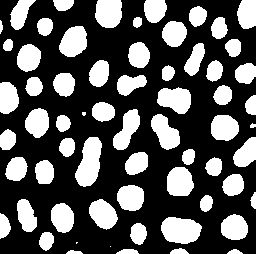

In [3]:
input_full = ij.scifio().datasetIO().open("http://imagej.net/images/blobs.gif")

//input_full has 3 channels. We only need one.
input = ij.op().run("hyperSliceView", input_full, 2, 0)

//invert the image so that the blobs are "on" and the background "off"
inverted = ij.op().run("create.img", input)
ij.op().run("invert", inverted, input)

binaryInput = ij.op().run("threshold.huang", inverted)

ij.notebook().display(binaryInput)

As it states in the Wikipedia article, opening is able to remove any object smaller than our `Shape`, while (as best it can) leaving objects larger than that element the same. Let's open our image with a somewhat large `Shape` to remove the smallest blobs in the image:

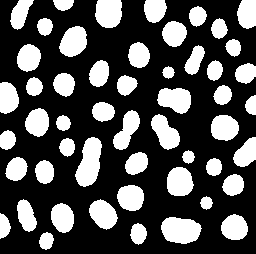

In [4]:
import net.imglib2.algorithm.neighborhood.HyperSphereShape

//create the shape that we are going to dilate the image with
shape = new HyperSphereShape(6)

output = ij.op().run("open", null, binaryInput, [shape])

ij.notebook().display(output)

To show the difference, let's [stack](../transform/stackView.ipynb) the images to see the difference:

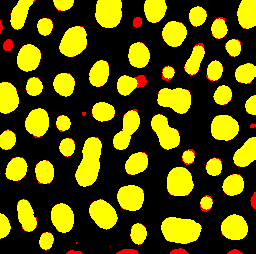

In [5]:
import net.imglib2.img.Img

list = new ArrayList<Img>()
 
list.add(binaryInput)
list.add(output)

stacked = ij.op().run("stackView", list)

ij.notebook().display(stacked)

Note the yellow regions where the largest blobs remained (mostly) intact from the original in red to the output of the `Op` in green. Note the more [eccentric](https://en.wikipedia.org/wiki/Eccentricity_(mathematics)) the object the poorer it was restored (due to our `Shape` being a `HyperSphere`). However the smallest objects (shown in red) are removed from the image.